**Importing the libraries**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC


In [2]:

from google.colab import drive
drive.mount("/SVM")


Mounted at /SVM


**Importing the dataset**

In [3]:

dataset = pd.read_csv('/SVM/MyDrive/Supervised and Unsupervised machine learning/Supervised Machine Learning/Dataset/Social_Network_Ads.csv')
dataset.head(8)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


In [4]:

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


**Splitting the dataset into the Training set and Test set**

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


**Feature Scaling**

In [6]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Fitting K-Nearest Neighbour to the Training set**

In [8]:

from sklearn.neighbors import  KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
classifier.fit(X_train, y_train)


KNeighborsClassifier()

**Predicting the Test set results**

In [9]:

y_pred = classifier.predict(X_test)


In [10]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[64,  4],
       [ 3, 29]])

**Visualising the Training set results**

<ipython-input-13-a8d9117f1f42>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


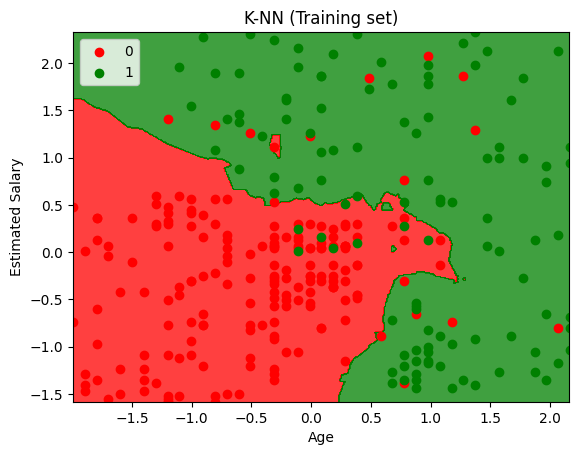

In [13]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max() , step = 0.01),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))#with (), ('red', 'green') is parameter
#cmap for distinguish two parts into green and red 
#A contour plot is a graphical technique which portrays a 3-dimensional surface in two dimensions

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):#i is index and j is element of y_set
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i),label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

<ipython-input-14-ae09fa6adf2e>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


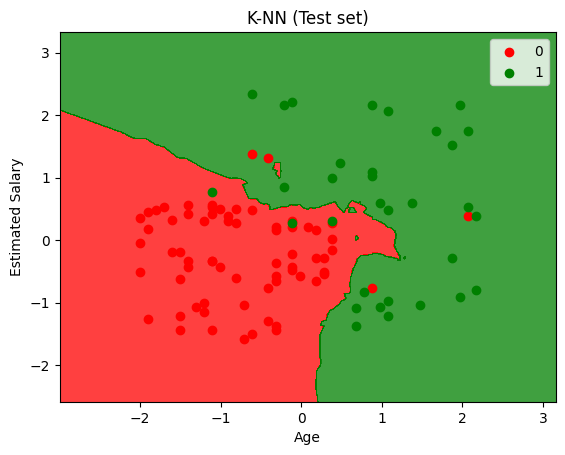

In [14]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
